In [2]:
import sys
sys.path.append('core')

In [13]:
import matplotlib.pyplot as plt
import torch
from utils.flow_viz import flow_to_image

import datasets

In [5]:
data = datasets.KITTI()

In [26]:
img1, img2, flow, valid = data[1]

flow_np = flow.permute(1, 2, 0).numpy()
flow_vis = torch.from_numpy(flow_to_image(flow_np)).permute(2, 0, 1)
valid = valid[None, :].repeat(3, 1, 1)

print(f'img1: {img1.shape}, {img1.min()} ~ {img1.max()}')
print(f'img2: {img2.shape}, {img2.min()} ~ {img2.max()}')
print(f'flow_vis: {flow_vis.shape}, {flow_vis.min()} ~ {flow_vis.max()}')
print(f'valid: {valid.shape}, {valid.min()} ~ {valid.max()}')

img1: torch.Size([3, 375, 1242]), 0.0 ~ 255.0
img2: torch.Size([3, 375, 1242]), 0.0 ~ 255.0
flow_vis: torch.Size([3, 375, 1242]), 0 ~ 255
valid: torch.Size([3, 375, 1242]), 0.0 ~ 1.0


In [30]:
viz = torch.cat([
    torch.cat([img1 / 255.0, img2 / 255.0], dim=2),
    torch.cat([flow_vis / 255.0, valid > 0.5], dim=2)
], dim=1)
print(viz.shape)

torch.Size([3, 750, 2484])


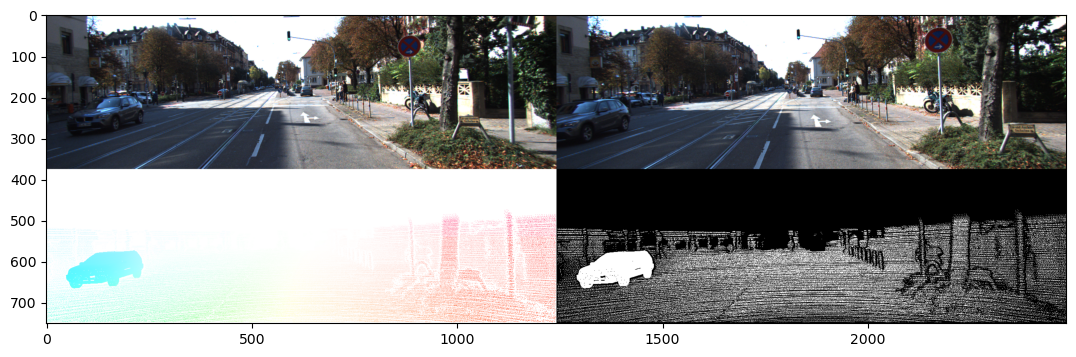

In [31]:
plt.figure(figsize=(15, 4))
plt.imshow(viz.permute(1, 2, 0).numpy())
plt.show()